# Stability

CFL for 1d linear convection must be $<=1$.This means
$$c\frac{\Delta{}t}{\Delta{}x}\leq1$$
With this you can calculate $\Delta{}x$
$$\Delta{}x\leq\frac{\Delta{}x}{c}=\frac{0.2}{4}$$

In [1]:
print('x may not exceed %.2f' % (0.2/4))

x may not exceed 0.05


# Sympy

In [2]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16




from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify

x = sympy.symbols('x')

phi = sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))

phiprime=phi.diff(x)

phiprime

philamb = lambdify((x),phiprime)

print("The value of phi at x=2.2 is {:.6f}.".format(philamb(2.2)))

The value of phi at x=2.2 is -0.000266.


# Coding assignment: traffic flow

$$F=V_{max}\rho\bigg(1-\frac{\rho}{\rho_{max}}\bigg)$$

0 250 80 11 51 0.22 0.001
Minimum velocity at t=0: 17.78
Average velocity at t=0: 20.64
50 250 80 11 51 0.22 0.001
Minimum velocity at t=3: 18.16
Average velocity at t=3: 20.64
100 250 80 11 51 0.22 0.001
Minimum velocity at t=6: 20.23
Average velocity at t=6: 21.27


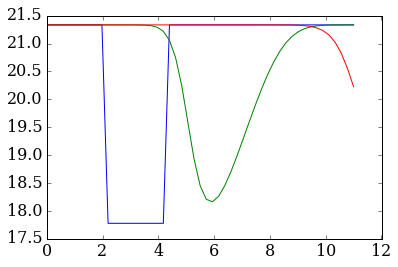

In [7]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify


def traffic(t):
    rho=rho0
    v=numpy.zeros(nx)
    T=int(t/60/dt)
    print(T, rhomax, vmax,L , nx, dx, dt)
    for n in range(1,T): 
        rhon = rho.copy()
        #for i in range(1,nx): 
        #rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
        rho[1:] = rhon[1:] - dt/dx*((vmax*rhon[1:]*(1-(rhon[1:]/rhomax)))-(vmax*rhon[0:-1]*(1-(rhon[0:-1]/rhomax))))
        rho[0]=10
    v=vmax*rho*(1-rho/rhomax)/rho
    return rho,v


nx = 51
L=11   
dt = 0.001  
rhomax = 250
vmax = 80

x = numpy.linspace(0,L,nx)
dx=x[1]-x[0]


for j in [0,3,6]:
    #rho0 = numpy.ones(nx)*10
    #rho0[10:20] = 50
    #rho0[0]=10
    rho,v=traffic(j)
    pyplot.plot(x, v/3.6);
    #pyplot.plot(x,rho);
    print("Minimum velocity at t=%d: %.2f" % (j,min(v)/3.6))
    print("Average velocity at t=%d: %.2f" % (j,sum(v)/nx/3.6))

0 250 136 11 51 0.22 0.001
Minimum velocity at t=0: 30.22
Average velocity at t=0: 33.87
50 250 136 11 51 0.22 0.001
Minimum velocity at t=3: 30.95
Average velocity at t=3: 33.87


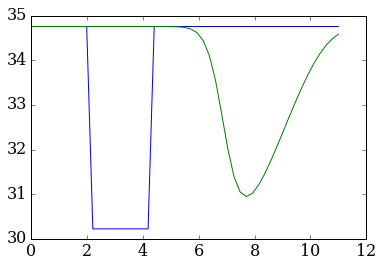

In [5]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify


nx = 51
L=11   
dt = 0.001  
rhomax = 250
vmax = 136

x = numpy.linspace(0,L,nx)
dx=x[1]-x[0]
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50
rho0[0]=20



def traffic(t):
    rho=rho0
    v=numpy.zeros(nx)
    T=int(t/60/dt)
    print(T, rhomax, vmax,L , nx, dx, dt)
    for n in range(1,T): 
        rhon = rho.copy()
        #for i in range(1,nx): 
        #rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
        rho[1:] = rhon[1:] - dt/dx*((vmax*rhon[1:]*(1-(rhon[1:]/rhomax)))-(vmax*rhon[0:-1]*(1-(rhon[0:-1]/rhomax))))
        rho[0]=20
    v=vmax*rho*(1-rho/rhomax)/rho
    return rho,v

for j in [0,3]:
    rho0 = numpy.ones(nx)*20
    rho0[10:20] = 50
    rho0[0]=20
    rho,v=traffic(j)
    pyplot.plot(x, v/3.6);
    #pyplot.plot(x,rho);
    print("Minimum velocity at t=%d: %.2f" % (j,min(v)/3.6))
    print("Average velocity at t=%d: %.2f" % (j,sum(v)/nx/3.6))